<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/0718_Cabbage_predict_train_val_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import os
# past = lookback
past = 7
# dat = predict future day
day = 3

In [152]:
if os.path.isfile("Cabbage.xlsx") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/Yi-Wei-Lin/dataset/Cabbage.xlsx"

if os.path.isfile("reportdaily_mean_fillna.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv"

if os.path.isfile("TyphoonDatabase.csv") == True:
  pass
else:
  !wget "https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/TyphoonDatabase.csv"

In [153]:
city = {
    '基隆市':'KLU',
    '臺北市':'TPE',
    '新北市':'TPH',
    '桃園市':'TYC',
    '新竹市':'HSC',
    '新竹縣':'HSH',
    '苗栗縣':'MAL',
    '臺中市':'TXG',
    '彰化縣':'CWH',
    '南投縣':'NTO',
    '雲林縣':'YLH',
    '嘉義市':'CYI',
    '嘉義縣':'CHY',
    '臺南市':'TNN',
    '高雄市':'KHH',
    '屏東縣':'IUH',
    '宜蘭縣':'ILN',
    '花蓮縣':'HWA',
    '臺東縣':'TTT'
}
df = pd.read_csv('reportdaily_mean_fillna.csv', encoding='utf-8')
# 使用index做merge
df_date = df['date'].drop_duplicates().to_frame().set_index('date')

for cityname, citycode in city.items():
    df_city = df.loc[df['city'] == cityname].add_suffix('_' + citycode).set_index('date' + '_' + citycode)
    df_date = pd.merge(df_date, df_city, how='left', left_index = True, right_index = True)

df_date.to_csv('all.csv', encoding='utf-8')
typhoon_df = pd.read_csv('TyphoonDatabase.csv', encoding='utf-8')
weather_df = pd.read_csv('all.csv', encoding='utf-8')
weather_df['WarnMark'] = 0
# 警報日期處理
import datetime

period_ctrl = 0 # 颱風警報期間控制
warn_mark = list()

for wd in typhoon_df['Warning']:
  start = datetime.datetime.strptime(wd[0:10], '%Y-%m-%d')
  end = datetime.datetime.strptime(wd[17:27], '%Y-%m-%d')
  period = end - start
  # print(period.days)
  
  ctrl_start = start
  i = 0
  
  warn_mark.append(wd[0:10])
  while i < period.days:
    start = start + datetime.timedelta(days=1)
    warn_mark.append(datetime.datetime.strftime(start, '%Y-%m-%d'))
    i = i + 1
  warn_mark.append(wd[17:27])

  if period_ctrl != 0:
    j = 0
    while j < period_ctrl:
      ctrl_start = ctrl_start - datetime.timedelta(days=1)
      warn_mark.append(datetime.datetime.strftime(ctrl_start, '%Y-%m-%d'))
      j = j + 1

unique_set = set(warn_mark)
unique_list = list(unique_set)
warn_mark = list()
warn_mark = unique_list
import csv

weather_list = weather_df.values.tolist()

with open('dataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  
  writer.writerow(['date','city_KLU','StnPres_KLU','SeaPres_KLU','StnPresMax_KLU','StnPresMaxTime_KLU','StnPresMin_KLU','StnPresMinTime_KLU','Temperature_KLU','TMax_KLU','TMaxTime_KLU','TMin_KLU','TMinTime_KLU','TdDewPoint_KLU','RH_KLU','RHMin_KLU','RHMinTime_KLU','WS_KLU','WD_KLU','WSGust_KLU','WDGust_KLU','WGustTime_KLU','Precp_KLU','PrecpHour_KLU','PrecpMax10_KLU','PrecpMax10Time_KLU','PrecpMax60_KLU','PrecpMax60Time_KLU','SunShine_KLU','SunShineRate_KLU','GloblRad_KLU','VisbMean_KLU','EvapA_KLU','UVIMax_KLU','UVIMaxTime_KLU','CloudAmount_KLU','city_TPE','StnPres_TPE','SeaPres_TPE','StnPresMax_TPE','StnPresMaxTime_TPE','StnPresMin_TPE','StnPresMinTime_TPE','Temperature_TPE','TMax_TPE','TMaxTime_TPE','TMin_TPE','TMinTime_TPE','TdDewPoint_TPE','RH_TPE','RHMin_TPE','RHMinTime_TPE','WS_TPE','WD_TPE','WSGust_TPE','WDGust_TPE','WGustTime_TPE','Precp_TPE','PrecpHour_TPE','PrecpMax10_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','SunShine_TPE','SunShineRate_TPE','GloblRad_TPE','VisbMean_TPE','EvapA_TPE','UVIMax_TPE','UVIMaxTime_TPE','CloudAmount_TPE','city_TPH','StnPres_TPH','SeaPres_TPH','StnPresMax_TPH','StnPresMaxTime_TPH','StnPresMin_TPH','StnPresMinTime_TPH','Temperature_TPH','TMax_TPH','TMaxTime_TPH','TMin_TPH','TMinTime_TPH','TdDewPoint_TPH','RH_TPH','RHMin_TPH','RHMinTime_TPH','WS_TPH','WD_TPH','WSGust_TPH','WDGust_TPH','WGustTime_TPH','Precp_TPH','PrecpHour_TPH','PrecpMax10_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','SunShine_TPH','SunShineRate_TPH','GloblRad_TPH','VisbMean_TPH','EvapA_TPH','UVIMax_TPH','UVIMaxTime_TPH','CloudAmount_TPH','city_TYC','StnPres_TYC','SeaPres_TYC','StnPresMax_TYC','StnPresMaxTime_TYC','StnPresMin_TYC','StnPresMinTime_TYC','Temperature_TYC','TMax_TYC','TMaxTime_TYC','TMin_TYC','TMinTime_TYC','TdDewPoint_TYC','RH_TYC','RHMin_TYC','RHMinTime_TYC','WS_TYC','WD_TYC','WSGust_TYC','WDGust_TYC','WGustTime_TYC','Precp_TYC','PrecpHour_TYC','PrecpMax10_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','SunShine_TYC','SunShineRate_TYC','GloblRad_TYC','VisbMean_TYC','EvapA_TYC','UVIMax_TYC','UVIMaxTime_TYC','CloudAmount_TYC','city_HSC','StnPres_HSC','SeaPres_HSC','StnPresMax_HSC','StnPresMaxTime_HSC','StnPresMin_HSC','StnPresMinTime_HSC','Temperature_HSC','TMax_HSC','TMaxTime_HSC','TMin_HSC','TMinTime_HSC','TdDewPoint_HSC','RH_HSC','RHMin_HSC','RHMinTime_HSC','WS_HSC','WD_HSC','WSGust_HSC','WDGust_HSC','WGustTime_HSC','Precp_HSC','PrecpHour_HSC','PrecpMax10_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','SunShine_HSC','SunShineRate_HSC','GloblRad_HSC','VisbMean_HSC','EvapA_HSC','UVIMax_HSC','UVIMaxTime_HSC','CloudAmount_HSC','city_HSH','StnPres_HSH','SeaPres_HSH','StnPresMax_HSH','StnPresMaxTime_HSH','StnPresMin_HSH','StnPresMinTime_HSH','Temperature_HSH','TMax_HSH','TMaxTime_HSH','TMin_HSH','TMinTime_HSH','TdDewPoint_HSH','RH_HSH','RHMin_HSH','RHMinTime_HSH','WS_HSH','WD_HSH','WSGust_HSH','WDGust_HSH','WGustTime_HSH','Precp_HSH','PrecpHour_HSH','PrecpMax10_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','SunShine_HSH','SunShineRate_HSH','GloblRad_HSH','VisbMean_HSH','EvapA_HSH','UVIMax_HSH','UVIMaxTime_HSH','CloudAmount_HSH','city_MAL','StnPres_MAL','SeaPres_MAL','StnPresMax_MAL','StnPresMaxTime_MAL','StnPresMin_MAL','StnPresMinTime_MAL','Temperature_MAL','TMax_MAL','TMaxTime_MAL','TMin_MAL','TMinTime_MAL','TdDewPoint_MAL','RH_MAL','RHMin_MAL','RHMinTime_MAL','WS_MAL','WD_MAL','WSGust_MAL','WDGust_MAL','WGustTime_MAL','Precp_MAL','PrecpHour_MAL','PrecpMax10_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','SunShine_MAL','SunShineRate_MAL','GloblRad_MAL','VisbMean_MAL','EvapA_MAL','UVIMax_MAL','UVIMaxTime_MAL','CloudAmount_MAL','city_TXG','StnPres_TXG','SeaPres_TXG','StnPresMax_TXG','StnPresMaxTime_TXG','StnPresMin_TXG','StnPresMinTime_TXG','Temperature_TXG','TMax_TXG','TMaxTime_TXG','TMin_TXG','TMinTime_TXG','TdDewPoint_TXG','RH_TXG','RHMin_TXG','RHMinTime_TXG','WS_TXG','WD_TXG','WSGust_TXG','WDGust_TXG','WGustTime_TXG','Precp_TXG','PrecpHour_TXG','PrecpMax10_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','SunShine_TXG','SunShineRate_TXG','GloblRad_TXG','VisbMean_TXG','EvapA_TXG','UVIMax_TXG','UVIMaxTime_TXG','CloudAmount_TXG','city_CWH','StnPres_CWH','SeaPres_CWH','StnPresMax_CWH','StnPresMaxTime_CWH','StnPresMin_CWH','StnPresMinTime_CWH','Temperature_CWH','TMax_CWH','TMaxTime_CWH','TMin_CWH','TMinTime_CWH','TdDewPoint_CWH','RH_CWH','RHMin_CWH','RHMinTime_CWH','WS_CWH','WD_CWH','WSGust_CWH','WDGust_CWH','WGustTime_CWH','Precp_CWH','PrecpHour_CWH','PrecpMax10_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','SunShine_CWH','SunShineRate_CWH','GloblRad_CWH','VisbMean_CWH','EvapA_CWH','UVIMax_CWH','UVIMaxTime_CWH','CloudAmount_CWH','city_NTO','StnPres_NTO','SeaPres_NTO','StnPresMax_NTO','StnPresMaxTime_NTO','StnPresMin_NTO','StnPresMinTime_NTO','Temperature_NTO','TMax_NTO','TMaxTime_NTO','TMin_NTO','TMinTime_NTO','TdDewPoint_NTO','RH_NTO','RHMin_NTO','RHMinTime_NTO','WS_NTO','WD_NTO','WSGust_NTO','WDGust_NTO','WGustTime_NTO','Precp_NTO','PrecpHour_NTO','PrecpMax10_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','SunShine_NTO','SunShineRate_NTO','GloblRad_NTO','VisbMean_NTO','EvapA_NTO','UVIMax_NTO','UVIMaxTime_NTO','CloudAmount_NTO','city_YLH','StnPres_YLH','SeaPres_YLH','StnPresMax_YLH','StnPresMaxTime_YLH','StnPresMin_YLH','StnPresMinTime_YLH','Temperature_YLH','TMax_YLH','TMaxTime_YLH','TMin_YLH','TMinTime_YLH','TdDewPoint_YLH','RH_YLH','RHMin_YLH','RHMinTime_YLH','WS_YLH','WD_YLH','WSGust_YLH','WDGust_YLH','WGustTime_YLH','Precp_YLH','PrecpHour_YLH','PrecpMax10_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','SunShine_YLH','SunShineRate_YLH','GloblRad_YLH','VisbMean_YLH','EvapA_YLH','UVIMax_YLH','UVIMaxTime_YLH','CloudAmount_YLH','city_CYI','StnPres_CYI','SeaPres_CYI','StnPresMax_CYI','StnPresMaxTime_CYI','StnPresMin_CYI','StnPresMinTime_CYI','Temperature_CYI','TMax_CYI','TMaxTime_CYI','TMin_CYI','TMinTime_CYI','TdDewPoint_CYI','RH_CYI','RHMin_CYI','RHMinTime_CYI','WS_CYI','WD_CYI','WSGust_CYI','WDGust_CYI','WGustTime_CYI','Precp_CYI','PrecpHour_CYI','PrecpMax10_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','SunShine_CYI','SunShineRate_CYI','GloblRad_CYI','VisbMean_CYI','EvapA_CYI','UVIMax_CYI','UVIMaxTime_CYI','CloudAmount_CYI','city_CHY','StnPres_CHY','SeaPres_CHY','StnPresMax_CHY','StnPresMaxTime_CHY','StnPresMin_CHY','StnPresMinTime_CHY','Temperature_CHY','TMax_CHY','TMaxTime_CHY','TMin_CHY','TMinTime_CHY','TdDewPoint_CHY','RH_CHY','RHMin_CHY','RHMinTime_CHY','WS_CHY','WD_CHY','WSGust_CHY','WDGust_CHY','WGustTime_CHY','Precp_CHY','PrecpHour_CHY','PrecpMax10_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','SunShine_CHY','SunShineRate_CHY','GloblRad_CHY','VisbMean_CHY','EvapA_CHY','UVIMax_CHY','UVIMaxTime_CHY','CloudAmount_CHY','city_TNN','StnPres_TNN','SeaPres_TNN','StnPresMax_TNN','StnPresMaxTime_TNN','StnPresMin_TNN','StnPresMinTime_TNN','Temperature_TNN','TMax_TNN','TMaxTime_TNN','TMin_TNN','TMinTime_TNN','TdDewPoint_TNN','RH_TNN','RHMin_TNN','RHMinTime_TNN','WS_TNN','WD_TNN','WSGust_TNN','WDGust_TNN','WGustTime_TNN','Precp_TNN','PrecpHour_TNN','PrecpMax10_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','SunShine_TNN','SunShineRate_TNN','GloblRad_TNN','VisbMean_TNN','EvapA_TNN','UVIMax_TNN','UVIMaxTime_TNN','CloudAmount_TNN','city_KHH','StnPres_KHH','SeaPres_KHH','StnPresMax_KHH','StnPresMaxTime_KHH','StnPresMin_KHH','StnPresMinTime_KHH','Temperature_KHH','TMax_KHH','TMaxTime_KHH','TMin_KHH','TMinTime_KHH','TdDewPoint_KHH','RH_KHH','RHMin_KHH','RHMinTime_KHH','WS_KHH','WD_KHH','WSGust_KHH','WDGust_KHH','WGustTime_KHH','Precp_KHH','PrecpHour_KHH','PrecpMax10_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','SunShine_KHH','SunShineRate_KHH','GloblRad_KHH','VisbMean_KHH','EvapA_KHH','UVIMax_KHH','UVIMaxTime_KHH','CloudAmount_KHH','city_IUH','StnPres_IUH','SeaPres_IUH','StnPresMax_IUH','StnPresMaxTime_IUH','StnPresMin_IUH','StnPresMinTime_IUH','Temperature_IUH','TMax_IUH','TMaxTime_IUH','TMin_IUH','TMinTime_IUH','TdDewPoint_IUH','RH_IUH','RHMin_IUH','RHMinTime_IUH','WS_IUH','WD_IUH','WSGust_IUH','WDGust_IUH','WGustTime_IUH','Precp_IUH','PrecpHour_IUH','PrecpMax10_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','SunShine_IUH','SunShineRate_IUH','GloblRad_IUH','VisbMean_IUH','EvapA_IUH','UVIMax_IUH','UVIMaxTime_IUH','CloudAmount_IUH','city_ILN','StnPres_ILN','SeaPres_ILN','StnPresMax_ILN','StnPresMaxTime_ILN','StnPresMin_ILN','StnPresMinTime_ILN','Temperature_ILN','TMax_ILN','TMaxTime_ILN','TMin_ILN','TMinTime_ILN','TdDewPoint_ILN','RH_ILN','RHMin_ILN','RHMinTime_ILN','WS_ILN','WD_ILN','WSGust_ILN','WDGust_ILN','WGustTime_ILN','Precp_ILN','PrecpHour_ILN','PrecpMax10_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','SunShine_ILN','SunShineRate_ILN','GloblRad_ILN','VisbMean_ILN','EvapA_ILN','UVIMax_ILN','UVIMaxTime_ILN','CloudAmount_ILN','city_HWA','StnPres_HWA','SeaPres_HWA','StnPresMax_HWA','StnPresMaxTime_HWA','StnPresMin_HWA','StnPresMinTime_HWA','Temperature_HWA','TMax_HWA','TMaxTime_HWA','TMin_HWA','TMinTime_HWA','TdDewPoint_HWA','RH_HWA','RHMin_HWA','RHMinTime_HWA','WS_HWA','WD_HWA','WSGust_HWA','WDGust_HWA','WGustTime_HWA','Precp_HWA','PrecpHour_HWA','PrecpMax10_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','SunShine_HWA','SunShineRate_HWA','GloblRad_HWA','VisbMean_HWA','EvapA_HWA','UVIMax_HWA','UVIMaxTime_HWA','CloudAmount_HWA','city_TTT','StnPres_TTT','SeaPres_TTT','StnPresMax_TTT','StnPresMaxTime_TTT','StnPresMin_TTT','StnPresMinTime_TTT','Temperature_TTT','TMax_TTT','TMaxTime_TTT','TMin_TTT','TMinTime_TTT','TdDewPoint_TTT','RH_TTT','RHMin_TTT','RHMinTime_TTT','WS_TTT','WD_TTT','WSGust_TTT','WDGust_TTT','WGustTime_TTT','Precp_TTT','PrecpHour_TTT','PrecpMax10_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','SunShine_TTT','SunShineRate_TTT','GloblRad_TTT','VisbMean_TTT','EvapA_TTT','UVIMax_TTT','UVIMaxTime_TTT','CloudAmount_TTT','WarnMark'])

  for wl in weather_list:
    f = 0
    for wm in warn_mark:
      if wl[0] == wm:
        wl[666] = 1
        writer.writerow(wl)
        f = 1
    if f == 0:
      writer.writerow(wl)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
data = pd.read_excel("Cabbage.xlsx")
data_w = pd.read_csv("dataset.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
drop_name = ["city_", "StnPresMaxTime_", "StnPresMinTime_", "TMaxTime_", "TMinTime_", "RHMinTime_", "WGustTime_", "PrecpMax10Time_", "PrecpMax60Time_", "UVIMaxTime_"]
city = [
    'KLU',
    'TPE',
    'TPH',
    'TYC',
    'HSC',
    'HSH',
    'MAL',
    'TXG',
    'CWH',
    'NTO',
    'YLH',
    'CYI',
    'CHY',
    'TNN',
    'KHH',
    'IUH',
    'ILN',
    'HWA',
    'TTT'
]
drop = []
for c in city:
  for n in drop_name:
    drop.append(n+c)
data_w = data_w.drop(drop, axis=1).dropna()
data_w = data_w.rename(columns={'date':'Date'})
data_w["Date"] = pd.to_datetime(data_w["Date"])

In [156]:
data = data.dropna()
data = data.loc[data["Market"] == "台北一"]
np.array(data["Avg_price"]).reshape(-1,1)

array([[ 8.9],
       [ 7.2],
       [ 6.7],
       ...,
       [15.1],
       [15.1],
       [15.5]])

In [157]:
data.head(2)

,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Volume,Month,Week_day,Year,Rest_day
39204,2000-01-02,台北一,LA1 甘藍 初秋,11.0,8.0,5.0,8.9,192029.0,1,7,2000,0
39205,2000-01-03,台北一,LA1 甘藍 初秋,9.0,7.0,4.0,7.2,174270.0,1,1,2000,0


In [158]:
data_w.head(2)

,Date,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,StnPresMax_TPE,StnPresMin_TPE,Temperature_TPE,TMax_TPE,TMin_TPE,TdDewPoint_TPE,RH_TPE,RHMin_TPE,WS_TPE,WD_TPE,WSGust_TPE,WDGust_TPE,...,WD_HWA,WSGust_HWA,WDGust_HWA,Precp_HWA,PrecpHour_HWA,PrecpMax10_HWA,PrecpMax60_HWA,SunShine_HWA,SunShineRate_HWA,GloblRad_HWA,VisbMean_HWA,EvapA_HWA,UVIMax_HWA,CloudAmount_HWA,StnPres_TTT,SeaPres_TTT,StnPresMax_TTT,StnPresMin_TTT,Temperature_TTT,TMax_TTT,TMin_TTT,TdDewPoint_TTT,RH_TTT,RHMin_TTT,WS_TTT,WD_TTT,WSGust_TTT,WDGust_TTT,Precp_TTT,PrecpHour_TTT,PrecpMax10_TTT,PrecpMax60_TTT,SunShine_TTT,SunShineRate_TTT,GloblRad_TTT,VisbMean_TTT,EvapA_TTT,UVIMax_TTT,CloudAmount_TTT,WarnMark
0,2000-01-01,1009.2,1016.9,1011.0,1007.2,19.3,22.6,16.9,14.3,73.5,63.0,3.8,280.0,10.6,180.0,2.2,0.4,1.9,2.2,3.8,36.6,5.6,13.9,2.0,3.0,6.0,996.4,1184.6,998.6,994.4,17.5,21.1,14.3,11.9,78.7,51.0,1.2,230.9,7.2,197.3,...,221.7,4.5,162.7,0.5,0.0,0.0,0.0,4.1,37.0,7.9,12.8,1.2,6.0,7.4,956.6,1015.0,989.5,982.9,19.2,25.0,17.7,16.9,74.8,61.8,1.8,119.2,7.2,75.2,0.0,0.0,0.1,0.1,3.1,28.9,7.6,15.5,2.9,6.0,7.1,0
1,2000-01-02,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,999.4,995.2,16.8,22.6,12.1,9.0,68.7,43.3,1.9,98.3,10.0,93.7,...,215.7,6.7,139.9,0.3,0.0,0.0,0.0,2.6,23.0,7.2,13.0,1.5,5.0,9.0,957.0,1015.9,976.0,971.3,17.9,22.1,16.5,14.1,64.0,50.2,2.8,119.8,11.4,89.7,0.0,0.0,0.0,0.0,4.2,38.9,8.5,14.6,3.6,2.0,6.9,0


In [159]:
data = pd.merge(data,data_w,how="left", on="Date").dropna()

In [160]:
# data_train = data[data["Date"] < "2020-06-01"]
# data_test = data[data["Date"] >= "2020-06-01"]
# data = data_train
data = data.reset_index()
data

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Volume,Month,Week_day,Year,Rest_day,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,...,WD_HWA,WSGust_HWA,WDGust_HWA,Precp_HWA,PrecpHour_HWA,PrecpMax10_HWA,PrecpMax60_HWA,SunShine_HWA,SunShineRate_HWA,GloblRad_HWA,VisbMean_HWA,EvapA_HWA,UVIMax_HWA,CloudAmount_HWA,StnPres_TTT,SeaPres_TTT,StnPresMax_TTT,StnPresMin_TTT,Temperature_TTT,TMax_TTT,TMin_TTT,TdDewPoint_TTT,RH_TTT,RHMin_TTT,WS_TTT,WD_TTT,WSGust_TTT,WDGust_TTT,Precp_TTT,PrecpHour_TTT,PrecpMax10_TTT,PrecpMax60_TTT,SunShine_TTT,SunShineRate_TTT,GloblRad_TTT,VisbMean_TTT,EvapA_TTT,UVIMax_TTT,CloudAmount_TTT,WarnMark
0,0,2000-01-02,台北一,LA1 甘藍 初秋,11.0,8.0,5.0,8.9,192029.0,1,7,2000,0,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,...,215.7,6.7,139.9,0.3,0.0,0.0,0.0,2.6,23.0,7.2,13.0,1.5,5.0,9.0,957.0,1015.9,976.0,971.3,17.9,22.1,16.5,14.1,64.0,50.2,2.8,119.8,11.4,89.7,0.0,0.0,0.0,0.0,4.2,38.9,8.5,14.6,3.6,2.0,6.9,0.0
1,1,2000-01-03,台北一,LA1 甘藍 初秋,9.0,7.0,4.0,7.2,174270.0,1,1,2000,0,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,997.1,1185.5,...,210.9,4.8,172.4,0.1,0.0,0.0,0.0,1.8,16.7,5.0,10.3,2.5,3.0,8.5,958.2,1016.9,989.8,986.6,16.9,22.2,16.2,13.5,64.2,56.5,2.2,101.1,9.8,66.7,0.0,0.0,0.0,0.0,5.2,47.8,8.0,13.1,3.2,4.0,6.5,0.0
2,2,2000-01-04,台北一,LA1 甘藍 初秋,8.0,6.0,3.0,6.7,125426.0,1,2,2000,0,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,995.6,1182.7,...,222.1,4.4,228.7,0.0,0.0,0.0,0.0,4.0,36.9,7.7,11.8,2.6,5.0,7.9,957.5,1016.1,988.8,985.7,17.2,23.1,16.5,14.6,67.5,58.0,1.5,136.2,5.9,204.2,0.0,0.0,0.0,0.0,3.1,28.5,7.0,12.3,2.6,4.0,7.0,0.0
3,3,2000-01-05,台北一,LA1 甘藍 初秋,10.0,7.0,4.0,7.1,119318.0,1,3,2000,0,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,994.3,1179.8,...,237.4,6.0,210.7,0.0,0.0,0.0,0.0,9.2,85.3,10.8,12.3,3.1,6.0,4.3,955.7,1013.8,987.5,982.6,19.5,26.6,16.8,17.2,72.5,61.0,1.4,191.3,7.3,225.0,0.2,0.2,0.6,0.7,8.9,82.9,12.1,16.4,2.5,6.0,3.3,0.0
4,4,2000-01-06,台北一,LA1 甘藍 初秋,9.0,7.0,5.0,6.8,118178.0,1,4,2000,0,1007.7,1015.3,1010.1,1005.9,19.9,23.1,16.8,14.8,72.5,64.0,4.5,55.0,14.3,75.0,8.5,0.8,3.8,8.0,5.7,53.5,7.0,9.2,1.3,4.0,5.3,994.1,1179.0,...,192.9,6.4,162.0,0.1,0.0,0.0,0.0,2.3,21.4,5.7,13.0,1.0,4.0,9.5,955.2,1013.2,986.1,982.9,18.5,24.1,17.9,17.7,78.2,67.8,2.0,102.5,8.7,67.2,3.2,1.2,2.5,4.7,1.5,14.0,5.4,13.2,1.9,5.0,7.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,6496,2021-06-12,台北一,LA1 甘藍 初秋,22.2,14.7,7.7,14.8,192738.0,6,6,2021,0,1002.1,1010.4,1003.9,1000.7,28.5,33.0,26.2,26.6,88.8,65.5,3.9,189.5,11.0,226.5,0.0,0.0,0.0,0.0,8.6,63.1,24.9,36.0,-0.1,14.0,7.1,983.3,1179.5,...,140.5,6.8,141.9,1.4,0.8,0.0,0.0,7.8,57.5,23.5,17.5,-5.7,14.0,7.4,972.1,1011.3,973.5,970.7,26.0,30.5,23.0,25.3,87.4,67.9,1.1,154.7,6.0,176.0,6.3,1.5,2.1,2.9,5.4,40.1,20.3,27.1,2.6,12.7,8.2,0.0
6497,6497,2021-06-13,台北一,LA1 甘藍 初秋,23.0,15.6,6.2,15.2,174973.0,6,7,2021,0,1001.4,1009.6,1003.7,999.0,28.6,33.6,25.5,26.5,87.2,66.8,2.7,211.8,9.1,164.2,0.0,0.1,0.0,0.0,7.3,53.9,23.6,31.9,6.8,12.0,8.2,982.7,1177.6,...,132.6,5.9,166.9,13.2,0.0,0.0,0.0,8.7,64.2,24.5,14.9,6.1,14.0,7.4,970.9,1010.1,973.3,968.6,26.5,30.9,23.5,25.7,86.9,68.0,1.1,151.0,6.3,201.8,2.5,1.0,0.7,1.2,7.5,55

In [161]:
# data_dum = pd.get_dummies(data)
# pd.DataFrame(data_dum)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Month"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Month_")
data = data.join(month, how="left")
# df.loc[df['city'] == '基隆市'].add_suffix('_' + 'KLU')
# df.rename(columns={'舊欄位名稱': '新欄位名稱'}) .add_prefix("Month_")

In [162]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Week_day"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + 1
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Week_day_")
data = data.join(month, how="left")

In [163]:
onehotencoder = OneHotEncoder()
data_str_ohe=onehotencoder.fit_transform(data[["Year"]]).toarray()
month = pd.DataFrame(data_str_ohe)
for i in month:
  new = int(i) + data["Year"].iloc[0]
  new = str(new)
  month = month.rename(columns={i:new})
month = month.add_prefix("Year_")
data = data.join(month, how="left")

In [164]:
data_train = data[data["Date"] < "2020-06-01"]
data_test = data[data["Date"] >= "2020-06-01"]

In [165]:
data_train

,index,Date,Market,Product,Up_price,Mid_price,Low_price,Avg_price,Volume,Month,Week_day,Year,Rest_day,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
0,0,2000-01-02,台北一,LA1 甘藍 初秋,11.0,8.0,5.0,8.9,192029.0,1,7,2000,0,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2000-01-03,台北一,LA1 甘藍 初秋,9.0,7.0,4.0,7.2,174270.0,1,1,2000,0,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,997.1,1185.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2000-01-04,台北一,LA1 甘藍 初秋,8.0,6.0,3.0,6.7,125426.0,1,2,2000,0,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,995.6,1182.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2000-01-05,台北一,LA1 甘藍 初秋,10.0,7.0,4.0,7.1,119318.0,1,3,2000,0,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,994.3,1179.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2000-01-06,台北一,LA1 甘藍 初秋,9.0,7.0,5.0,6.8,118178.0,1,4,2000,0,1007.7,1015.3,1010.1,1005.9,19.9,23.1,16.8,14.8,72.5,64.0,4.5,55.0,14.3,75.0,8.5,0.8,3.8,8.0,5.7,53.5,7.0,9.2,1.3,4.0,5.3,994.1,1179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6189,2020-05-27,台北一,LA1 甘藍 初秋,25.7,16.3,8.7,16.7,172209.0,5,3,2020,0,1002.2,1010.3,1004.3,999.7,23.2,26.6,22.2,22.4,95.0,85.5,3.2,38.2,11.5,30.0,11.8,9.7,2.5,5.5,0.1,0.3,8.0,20.8,-0.2,4.0,9.8,985.9,1170.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6190,6190,2020-05-28,台北一,LA1 甘藍 初秋,22.1,15.9,10.9,16.2,139310.0,5,4,2020,0,1003.9,1012.1,1005.6,1002.4,22.5,23.3,21.4,22.4,98.5,92.8,1.8,34.0,5.9,125.0,79.5,12.0,6.0,18.5,0.0,0.0,5.2,16.4,-0.8,2.0,10.0,987.7,1176.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6191,6191,2020-05-29,台北一,LA1 甘藍 初秋,22.8,18.0,12.1,17.8,135844.0,5,5,2020,0,1003.5,1011.6,1004.6,1002.3,25.1,28.7,23.0,24.4,96.0,80.5,2.1,164.8,8.2,80.2,14.0,3.4,5.5,9.5,3.1,23.3,17.3,19.8,-2.9,12.0,8.6,987.7,1179.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [166]:
data_train = data_train.drop(["index", "Date","Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
data_test = data_test.drop(["index", "Date","Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
data_train

,Up_price,Mid_price,Low_price,Avg_price,Volume,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,StnPresMax_TPE,StnPresMin_TPE,Temperature_TPE,TMax_TPE,TMin_TPE,TdDewPoint_TPE,RH_TPE,RHMin_TPE,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_day_1,Week_day_2,Week_day_3,Week_day_4,Week_day_5,Week_day_6,Week_day_7,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
0,11.0,8.0,5.0,8.9,192029.0,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,999.4,995.2,16.8,22.6,12.1,9.0,68.7,43.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,7.0,4.0,7.2,174270.0,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,997.1,1185.5,999.0,995.4,17.6,20.8,15.3,10.7,76.7,62.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,6.0,3.0,6.7,125426.0,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,995.6,1182.7,997.1,993.6,18.6,24.4,14.8,13.1,79.7,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,7.0,4.0,7.1,119318.0,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,994.3,1179.8,995.6,992.7,18.3,23.5,14.7,11.5,70.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,7.0,5.0,6.8,118178.0,1007.7,1015.3,1010.1,1005.9,19.9,23.1,16.8,14.8,72.5,64.0,4.5,55.0,14.3,75.0,8.5,0.8,3.8,8.0,5.7,53.5,7.0,9.2,1.3,4.0,5.3,994.1,1179.0,996.3,991.9,19.1,24.1,14.6,13.9,81.0,62.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,25.7,16.3,8.7,16.7,172209.0,1002.2,1010.3,1004.3,999.7,23.2,26.6,22.2,22.4,95.0,85.5,3.2,38.2,11.5,30.0,11.8,9.7,2.5,5.5,0.1,0.3,8.0,20.8,-0.2,4.0,9.8,985.9,1170.8,988.1,983.2,23.2,27.4,20.4,20.5,91.0,79.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6190,22.1,15.9,10.9,16.2,139310.0,1003.9,1012.1,1005.6,1002.4,22.5,23.3,21.4,22.4,98.5,92.8,1.8,34.0,5.9,125.0,79.5,12.0,6.0,18.5,0.0,0.0,5.2,16.4,-0.8,2.0,10.0,987.7,1176.7,989.4,985.5,22.3,24.3,19.8,21.0,96.2,89.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6191,22.8,18.0,12.1,17.8,135844.0,1003.5,1011.6,1004.6,1002.3,25.1,28.7,23.0,24.4,96.0,80.5,2.1,164.8,8.2,80.2,14.0,3.4,5.5,9.5,3.1,23.3,17.3,19.8,-2.9,12.0,8.6,987.7,1179.6,988.9,985.6,24.7,32.0,21.2,21.8,90.

In [167]:
# from tensorflow.keras.utils import to_categorical
# pd.DataFrame(to_categorical(data_train["Month"]))
feature = data_train.shape[1]
print(feature)

522


In [168]:
val_split = 0.2 # 
len_data = len(data_train)
len_train = int(len_data*(1-val_split))
len_val = (len_data-len_train)

In [169]:
print(len_data)
print(len_train)
print(len_val)
print(len_train + len_val)
data_val = data_train[len_train:]
data_train = data_train[0:len_train]

6194
4955
1239
6194


In [170]:
# preparing label data
Cabbage_shift = data_train.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_train = data_train.drop(data_train.index[len(data_train)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x, y = data_train.values, label.values

In [171]:
# preparing label data
Cabbage_shift = data_val.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_val = data_val.drop(data_val.index[len(data_val)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x_val, y_val = data_val.values, label.values

In [172]:
Cabbage_shift = data_test.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_test = data_test.drop(data_test.index[len(data_test)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
gg, yy = data_test.values, label.values

In [173]:
X = []
for i in range(len(data_train)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_train.iloc[i+d])
  X.append(xx)
X = np.array(X)
x_train = X
y_train = y[past-1:-day]

In [174]:
X = []
for i in range(len(data_val)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_val.iloc[i+d])
  X.append(xx)
X = np.array(X)
x_val = X
y_val = y_val[past-1:-day]
y_real = y_val

In [175]:
X = []
for i in range(len(data_test)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_test.iloc[i+d])
  X.append(xx)
X = np.array(X)
gg = X
yy = yy[past-1:-day]

In [176]:
y_val.shape

(1227,)

In [177]:
x_shape = x_train.shape[0]
x_val_shape = x_val.shape[0]
x_train = x_train.reshape(-1,feature)
x_val = x_val.reshape(-1,feature)

In [178]:
Xscaler = MinMaxScaler()
Yscaler = MinMaxScaler()
x_train = Xscaler.fit_transform(x_train)
y_train = Yscaler.fit_transform(y_train.reshape(-1,1))
x_val = Xscaler.transform(x_val)
y_val = Yscaler.transform(y_val.reshape(-1,1))

In [179]:
x_train.shape

(34601, 522)

In [180]:
# splitting train and test
# x_train = x_train.reshape((-1,1,5))
x_train = x_train.reshape((-1,past,feature))
x_val = x_val.reshape((-1,past,feature))

In [181]:
# Building LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
layers = [
    LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dropout(0.2),
    # LSTM(units=64, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=64, return_sequences=True),
    # Dropout(0.2),
    LSTM(units=64),
    # Dropout(0.2),
    Dense(units=32),
    Dense(units=1)
]
regressor = Sequential(layers)
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 150)            403800    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 460,953
Trainable params: 460,953
Non-trainable params: 0
_________________________________________________________________


In [182]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ModelCheckpoint
regressor.compile(loss = "mse",
         optimizer = Adam(learning_rate=0.001),
         metrics=["mse"]                   
)
callback = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("regressor.h5", save_best_only=True)
]
train_history = regressor.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_val,y_val), callbacks=callback)
# regressor.fit(x_train, y_train, epochs=40, batch_size=40, validation_split=0.1)

Epoch 1/1000
155/155 [==============================] - 9s 41ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 3/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 4/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 6/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 7/1000
155/155 [==============================] - 5s 34ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 8/1000
155/155 [==============================] -

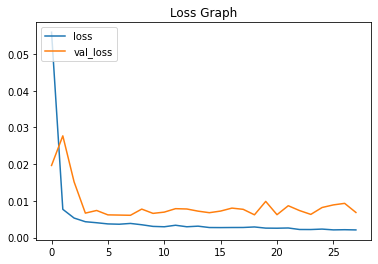

In [183]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [184]:
x_val = x_val.reshape(-1,past,feature)
pre_price = regressor.predict(x_val)
pre_price = pre_price.reshape(-1,1)
pre_price = Yscaler.inverse_transform(pre_price)
y_val = Yscaler.inverse_transform(y_val)

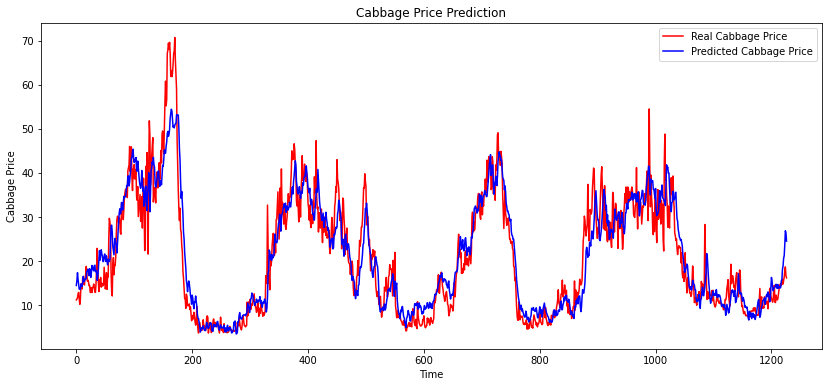

In [185]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_val, color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price, color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

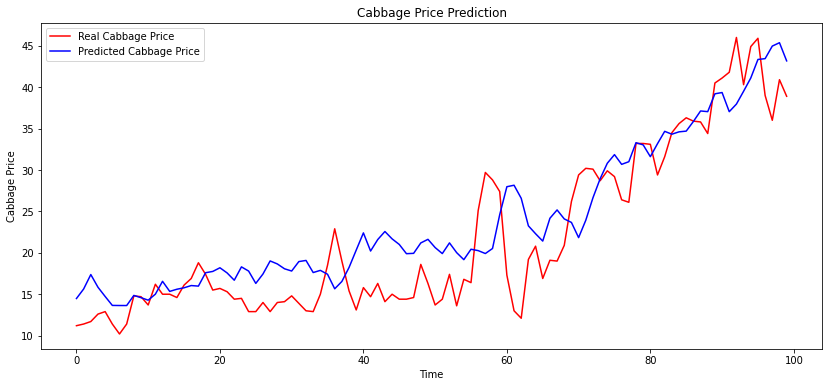

In [186]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_val[0:100], color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price[0:100], color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

In [187]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_val, pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_val, pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 23.895108271593955 
RMSE value : 4.888262295703244 
R2 score value : 0.8637514439223292


In [188]:
gg = Xscaler.transform(gg.reshape(-1,feature))
gg = gg.reshape(-1,past,feature)
gg_pre_price = regressor.predict(gg)
# gg_pre_price = pre_price.reshape(-1,1)
gg_pre_price = Yscaler.inverse_transform(gg_pre_price)

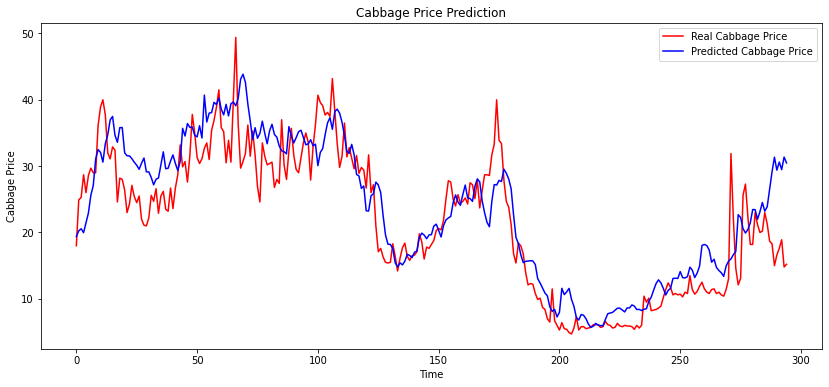

In [189]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy, color = 'red', label = 'Real Cabbage Price')
plt.plot(gg_pre_price, color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

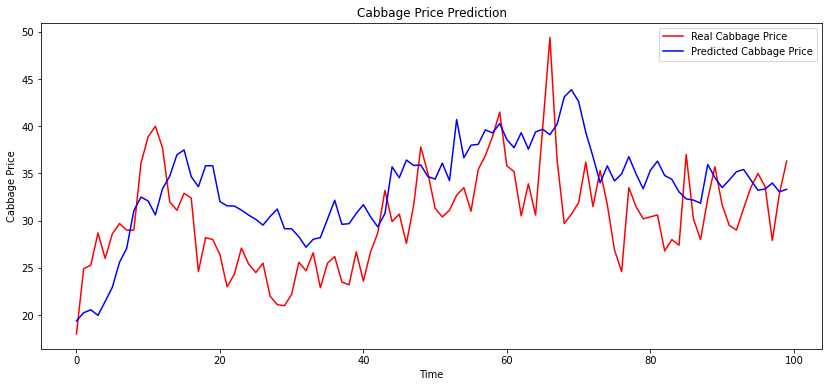

In [190]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(yy[0:100], color = 'red', label = 'Real Cabbage Price')
plt.plot(gg_pre_price[0:100], color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

In [191]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(yy, gg_pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(yy, gg_pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 25.812805421851756 
RMSE value : 5.080630415790127 
R2 score value : 0.7604877116367303
